1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 57.2 MB/s 
     |████████████████████████████████| 15.4 MB 40.0 MB/s 


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 5.4 MB/s 


In [ ]:
import geopandas
import pandas as pd
from shapely.geometry import Point

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021/Reg01012021")
Regioni

COD_RIP  ...                                           geometry
0         1  ...  POLYGON ((456874.626 5145767.794, 456879.627 5...
1         1  ...  POLYGON ((389358.653 5093659.158, 389433.654 5...
2         1  ...  MULTIPOLYGON (((485366.070 4984899.481, 485306...
3         2  ...  POLYGON ((743387.812 5219741.793, 743414.749 5...
4         2  ...  POLYGON ((768135.210 5175357.497, 768146.460 5...
5         2  ...  MULTIPOLYGON (((872344.457 5061894.048, 872344...
6         1  ...  MULTIPOLYGON (((568230.816 4874870.697, 568232...
7         2  ...  MULTIPOLYGON (((618335.211 4893983.160, 618329...
8         3  ...  MULTIPOLYGON (((673999.896 4681200.360, 674032...
9         3  ...  MULTIPOLYGON (((776426.122 4834159.173, 776480...
10        3  ...  POLYGON ((801317.492 4875251.455, 801336.492 4...
11        3  ...  MULTIPOLYGON (((875819.121 4525280.544, 875832...
12        4  ...  MULTIPOLYGON (((930273.425 4714737.743, 930147...
13        4  ...  POLYGON ((979228.843 4673419.649, 979255.343 4...
14        4  ...  MULTIPOLYGON (((1037266.901 4449456.848, 10372...
15        4  ...  MULTIPOLYGON (((1280636.111 4454459.746, 12806...
16        4  ...  MULTIPOLYGON (((1073851.435 4445828.604, 10738...
17        4  ...  MULTIPOLYGON (((1083350.847 4416684.239, 10833...
18        5  ...  MULTIPOLYGON (((822859.631 3935387.330, 822886...
19        5  ...  MULTIPOLYGON (((448823.400 4301758.251, 448845...

[20 rows x 6 columns]

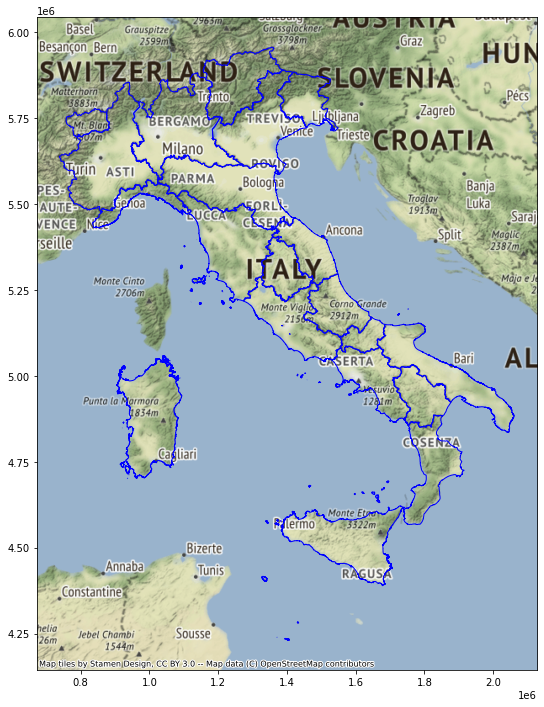

In [ ]:
import contextily
ax = Regioni.to_crs(epsg=3857).plot(figsize = (20,12),facecolor= "none", edgecolor= "b")
contextily.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa

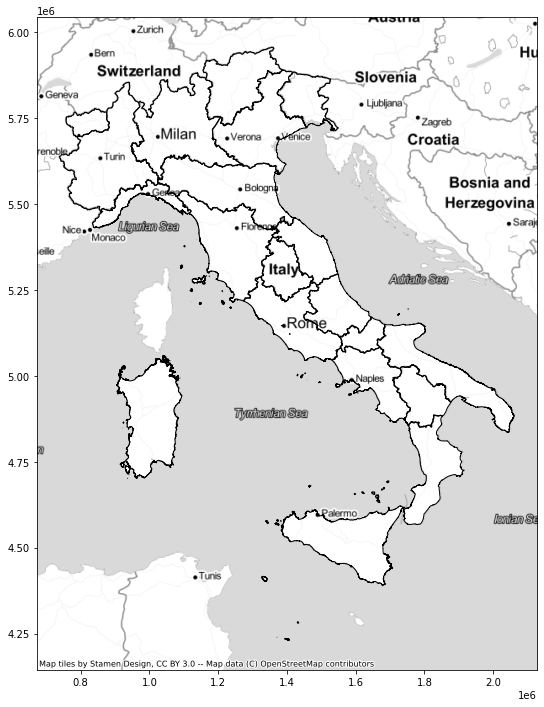

In [ ]:
ax = Regioni.to_crs(epsg=3857).plot(figsize = (20,12),facecolor= "none", edgecolor= "k")
contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite)

3. visualizzare le province della Lombardia su una mappa di contextily

In [ ]:
Province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021/ProvCM01012021")
Province

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411070.006 5...
1          1  ...  POLYGON ((437900.552 5088796.204, 437915.021 5...
2          1  ...  POLYGON ((459146.367 5079451.275, 459180.648 5...
3          1  ...  MULTIPOLYGON (((378928.552 4958539.163, 378934...
4          1  ...  POLYGON ((423634.299 4998152.373, 423642.986 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((456874.626 5145767.794, 456879.627 5...
103        1  ...  POLYGON ((519686.705 5065270.380, 519754.706 5...
104        3  ...  POLYGON ((885062.265 4803844.694, 885197.764 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448823.400 4301758.251, 448845...

[107 rows x 13 columns]

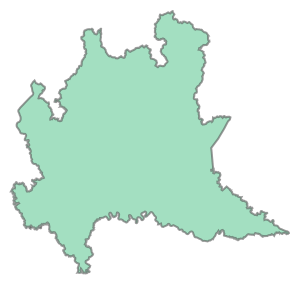

In [ ]:
Lombardia = Regioni.loc[Regioni["DEN_REG"] == "Lombardia", "geometry"].squeeze()
Lombardia

In [ ]:
provLomb = Province[Province.within(Lombardia)]
provLomb

COD_RIP  ...                                           geometry
11         1  ...  POLYGON ((483183.566 5104550.094, 483258.471 5...
12         1  ...  MULTIPOLYGON (((497972.209 5092219.684, 498135...
13         1  ...  POLYGON ((595652.358 5163515.659, 595847.357 5...
14         1  ...  MULTIPOLYGON (((537246.884 5005401.324, 537204...
15         1  ...  POLYGON ((584794.236 5104739.083, 584874.236 5...
16         1  ...  POLYGON ((613174.863 5134504.559, 613226.040 5...
17         1  ...  MULTIPOLYGON (((485366.070 4984899.481, 485306...
18         1  ...  POLYGON ((540703.548 5038937.573, 540737.737 5...
19         1  ...  POLYGON ((630265.440 5031814.757, 630409.883 5...
96         1  ...  POLYGON ((529205.142 5111010.753, 529212.313 5...
97         1  ...  POLYGON ((534210.409 5035224.602, 534213.784 5...
103        1  ...  POLYGON ((519686.705 5065270.380, 519754.706 5...

[12 rows x 13 columns]

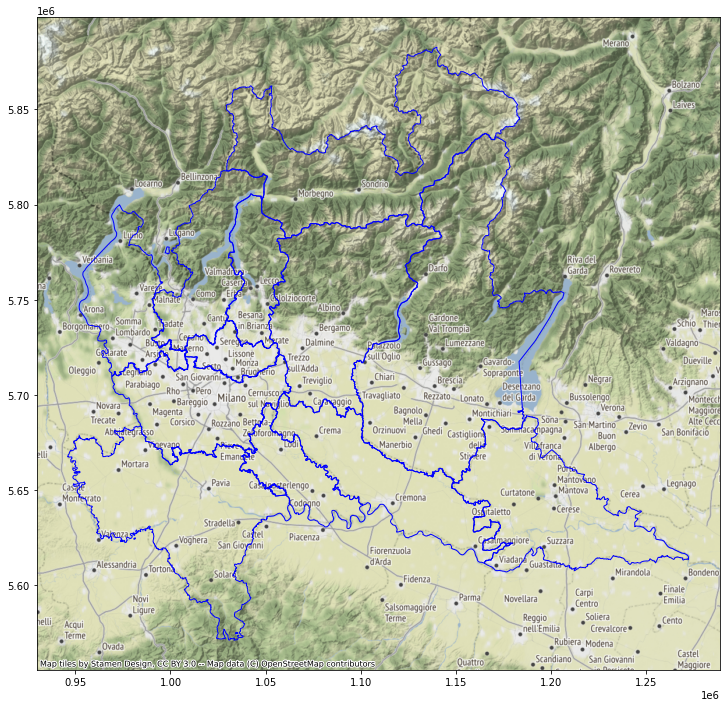

In [ ]:
ax = provLomb.to_crs(epsg=3857).plot(figsize = (20,12),facecolor= "none", edgecolor= "b")
contextily.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

In [ ]:
Comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021/Com01012021")
Comuni

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((414358.390 5042001.044, 414381.796 5...
1           1  ...  POLYGON ((394621.039 5031581.116, 394716.100 5...
2           1  ...  POLYGON ((364914.897 4993224.894, 364929.991 4...
3           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
4           1  ...  POLYGON ((388890.737 5030465.123, 388945.987 5...
...       ...  ...                                                ...
7898        5  ...  POLYGON ((911026.790 4190436.780, 911110.915 4...
7899        5  ...  POLYGON ((903617.640 4186159.573, 903583.834 4...
7900        2  ...  POLYGON ((676383.291 5127075.411, 676424.729 5...
7901        3  ...  POLYGON ((791585.579 4667342.828, 791638.892 4...
7902        1  ...  POLYGON ((587777.193 5006301.809, 587673.194 5...

[7903 rows x 14 columns]

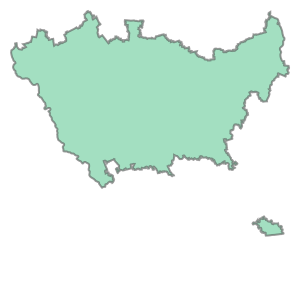

In [ ]:
Milano = Province.loc[Province['DEN_CM'] == 'Milano', 'geometry'].squeeze()
Milano

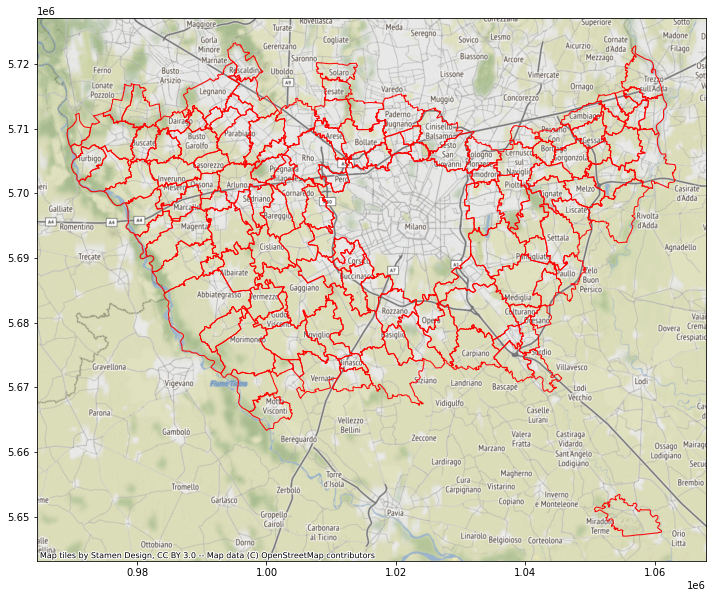

In [ ]:
comuni_Di_Milano = Comuni[Comuni.within(Milano)]
ax = comuniDiMilano.to_crs(epsg= 3857).plot(figsize= (12,15), facecolor = "none", edgecolor = "r")
contextily.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri.

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/ds964_nil_wm.zip")
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

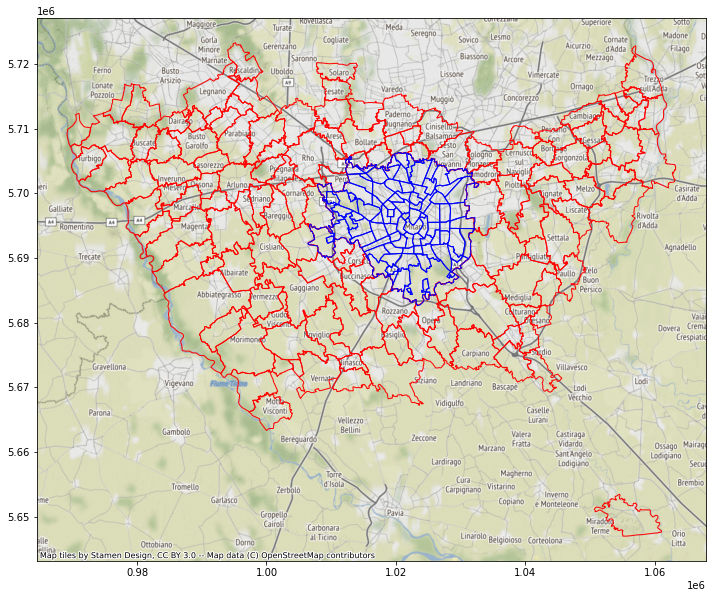

In [ ]:
ax = comuni_Di_Milano.to_crs(epsg= 3857).plot(figsize= (12,15), facecolor = "none", edgecolor = "r")
quartieri.to_crs(epsg= 3857).plot(ax=ax, facecolor = "none", edgecolor= "b")
contextily.add_basemap(ax)